# ETF, Fund, Stock and Bond Comparison

This Notebook takes two ETFs and compare them to evaluate which one is a better investment. Generally speaking, one ETF should represent a benchmark and the second is the one used for comparison. The procedure indicated in this Notebook can also be applied to funds, stocks and bonds since the same principles can be applied.
<br><br>
__INDEX:__
- 0. Libraries
- 1. Input Information
- 1.1. Input Definition
- 1.2 Reading Historical Price Data and Main Info
- 2. Annualized Returns
- 2.1. Annualized Return Graphs
- 2.2. Annualized Return Statistical Information
- 2.3. Modified Sharpe Ratio
- 2.4. Return Distribution Graphs
- 2.5. Return Distribution Comparison
- 2.6. Return Correlation
- 3. Excessive Return
- 3.1. Excessive Return Distribution
- 3.2. Excessive Return
- 4. Conclusions

## 0. Libraries
In this section the libraries used in this Notebook are imported.

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

__WARNING__: Yfinance package needs to be updated. Before running any analysis it is necessary check that the latest version of the package is installed. Use the following link https://pypi.org/project/yfinance/ to check the latest avaialble version.

In [2]:
# Yfinance currently installed. Refer to link above for the latest version available. 
yf.__version__

'0.1.70'

In [3]:
# Remove the "#" in the line below to install the new version.
# pip install yfinance

## 1. Input Information 
In this section main info is defined. This section includes the input of ETF (or Fund, Stocks and Bonds) tickers that are considered in the comparison. Since the historical data may be different for different ETF, only the overlapped time frame is analyzed. For example, if the historical data of ETF-#1 ranges from 1990 to 2005, and the one of ETF-#2 ranges from 1995 to 2000, the comparison is made for the period 1995-2000. In this way the returns refer to the same time. This shall eliminate any inconsistency coming from different analyzed periods.

### 1.1. Input definition
In this section the EFT (or fund, stock or bond) tickers are provided. Change tickers as needed.In addition, different comparison periods can be defined (in years).

In [4]:
# Input information
thicker_1 = 'SPY' # This should be the benchmark
thicker_2 = 'QQQ' # this should be the one to compare
periods = [1,2,3,5,7,10,15] # Timeframe, in years, for comparison
rf_rate = 3 #Risk free rate in % e.g. input 3 if risk-free rate is 3%

### 1.2. Reading Historical Price Data and Main Info
In this section the historical price data is downloaded using yFinance library. Only __close price__ is used in the evaluation below.

In [5]:
# Historical data is read and the overlapping timeframe is considered and used later in the analysis
df1 = yf.download(thicker_1)
df2 = yf.download(thicker_2)
t1 = df1.index
t2 = df2.index
t_min = max(t1.min(),t2.min())
t_max = min(t1.max(),t2.max())
print('Time frame considered:\nPeriod starts on',t_min.strftime('%m/%d/%Y'),
      '\nPeriod ends on',t_max.strftime('%m/%d/%Y'))
print('Timeframe is',(t_max-t_min).days,'days (',round((t_max-t_min).days/365,2),'years )')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Time frame considered:
Period starts on 03/10/1999 
Period ends on 06/10/2022
Timeframe is 8493 days ( 23.27 years )


In [6]:
# The DF below have the same range in terms of period so that they are comparable
df1 = df1.loc[t_min:t_max][['Close']]
df2 = df2.loc[t_min:t_max][['Close']]
# This is just a check if the df1 and df2 date correspond
if (df1[df1.index == df2.index].shape[0] == df1.shape[0] == df2.shape[0]) == True: print('DataFrames match - OK')
else: print('ERROR - DataFrames do not match - Check input.')

DataFrames match - OK


## 2. Annualized Returns
For each equity, annualized returns are calculated for different time frames. For an investment time frame of (n) years, the annualized return is calculated as:
<br><br>
$Annualized Return = (\frac{Price_{i}}{Price_{i-tf}})^{(1/n)}-1$
<br><br>
where:
<br> - __Price(i)__ is the closing price at time (i)
<br> - __Price(i-tf)__ is the closing price at time (i-tf)
<br> - __tf__ is the timeframe considered and equal to (i - 252 x n)

In [7]:
# One year is approximatively equal to 252 days in the DataFrame since weekends and holidays are not incuded in the data
for n in periods:
    df1['Ann. Return for '+ str(n) + '-y period'] = ( (df1['Close'] / df1['Close'].shift(n*252) ) ** (1/n) - 1 ) *100
    df2['Ann. Return for '+ str(n) + '-y period'] = ( (df2['Close'] / df2['Close'].shift(n*252) ) ** (1/n) - 1 ) *100

### 2.1. Annualized Return Graphs
Annualized returns for different timeframes and for the two equities considered are shown in the graph below. The graph should be read as follow: when a specific date (example: DD/MM/YY) and time frame (example: N-years) are selected, the related point in the graph represent the annualized return on DD/MM/YYYY as if the money was invested N-years ago.

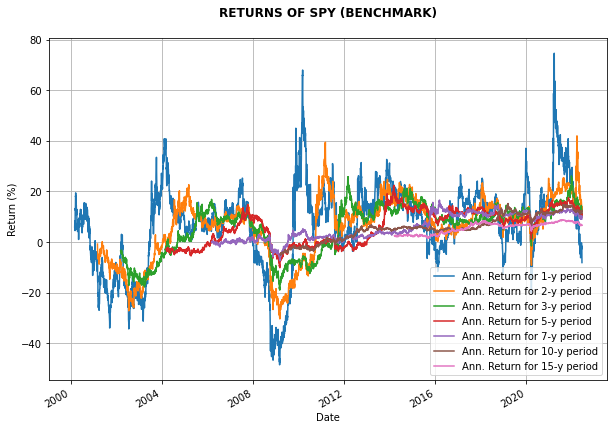

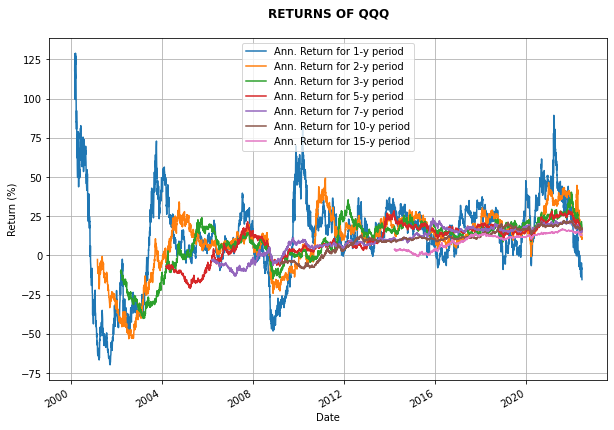

In [8]:
# This part is to plot, for each equity separately, the calcuated returns
df1.iloc[:,1:].plot(figsize=(10,7))
plt.grid()
plt.ylabel('Return (%)')
plt.title('RETURNS OF '+ thicker_1 +' (BENCHMARK)\n',fontweight='bold')
df2.iloc[:,1:].plot(figsize=(10,7))
plt.grid()
plt.ylabel('Return (%)')
plt.title('RETURNS OF '+thicker_2 +'\n',fontweight='bold')
plt.show()

### 2.2. Annualized Return Statistical Information
When, for each equity, the annualized returns are available, the related statistical information (i.e. mean, standard deviation, etc.) is calculated. Note that if the historical data is shorter that the time frame selected, the returns are not calculated. This situation happens when the data is limited i.e. prices are available only for a few years.

In [9]:
print('Annualized Return Statistical Information (' + thicker_1 + '):')
round(df1.describe(),2)

Annualized Return Statistical Information (SPY):


,Close,Ann. Return for 1-y period,Ann. Return for 2-y period,Ann. Return for 3-y period,Ann. Return for 5-y period,Ann. Return for 7-y period,Ann. Return for 10-y period,Ann. Return for 15-y period
count,5854.00,5602.00,5350.00,5098.00,4594.00,4090.00,3334.00,2074.00
mean,180.67,6.89,5.90,5.64,5.97,5.80,5.69,5.63
std,90.64,16.70,12.22,9.52,6.84,5.13,4.88,2.12
min,68.11,-48.59,-30.43,-18.96,-10.16,-7.41,-5.23,1.52
25%,118.72,0.03,0.51,-1.17,-1.01,1.54,3.45,3.31
50%,140.82,9.78,8.37,8.82,7.89,4.00,5.41,6.48
75%,214.58,16.15,13.91,12.28,11.85,11.08,10.77,7.34
max,477.71,74.70,42.01,26.16,22.41,16.60,15.24,8.81


In [10]:
print('Annualized Return Statistical Information (' + thicker_2 + '):')
round(df2.describe(),2)

Annualized Return Statistical Information (QQQ):


,Close,Ann. Return for 1-y period,Ann. Return for 2-y period,Ann. Return for 3-y period,Ann. Return for 5-y period,Ann. Return for 7-y period,Ann. Return for 10-y period,Ann. Return for 15-y period
count,5854.00,5602.00,5350.00,5098.00,4594.00,4090.00,3334.00,2074.00
mean,98.59,11.85,9.30,9.12,9.84,9.86,10.06,9.76
std,85.99,27.05,18.89,14.94,10.84,8.67,7.73,4.86
min,20.06,-69.70,-53.08,-40.16,-20.99,-13.05,-8.45,-0.70
25%,41.21,1.84,3.75,2.44,3.92,6.03,8.55,5.59
50%,61.60,13.95,12.81,14.03,12.50,10.24,10.88,11.66
75%,116.08,27.30,20.72,18.69,17.86,16.95,16.53,13.39
max,403.99,128.94,49.36,40.37,28.51,23.82,22.31,16.78


### 2.3. Modified Sharpe Ratio
For each time frame considered, a parameter similar to Sharpe Ratio is calculated as follow:
<br><br>
$Mod. Sharpe Ratio = \frac{Average Return - Risk Free Rate}{Standard Deviation}$
<br><br>
__Note:__ This is NOT the Shape Ratio (here the notation ___Modified Sharpe Ratio___) since the average return and the standard deviation are NOT evaluated in the same way. Despite this, the introduced parameter can be still used for comparison.

In [11]:
# Modified Sharpe Ratio
msr_1 = round((df1.mean() - rf_rate)/df1.std(),2)
msr_2 = round((df2.mean() - rf_rate)/df2.std(),2)

### 2.4. Return Distribution Graphs
In the graphs below the distribution of returns for the two equities and for different time frames are reported. 

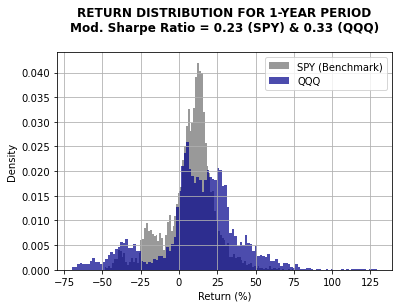

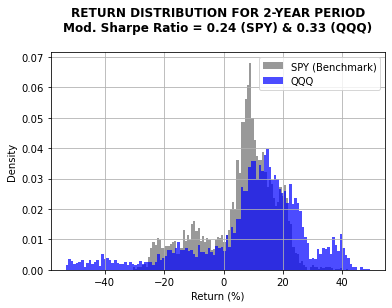

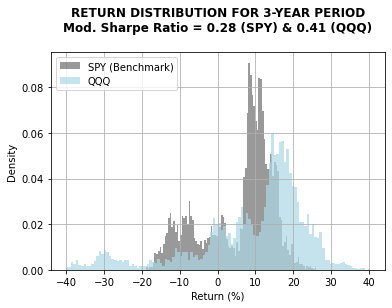

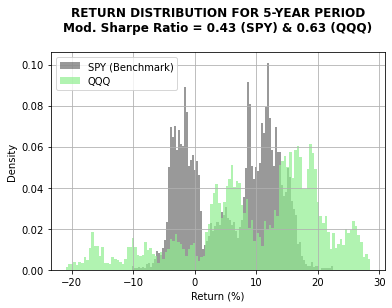

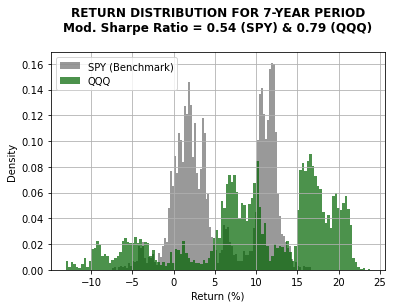

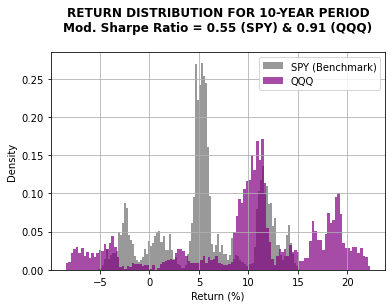

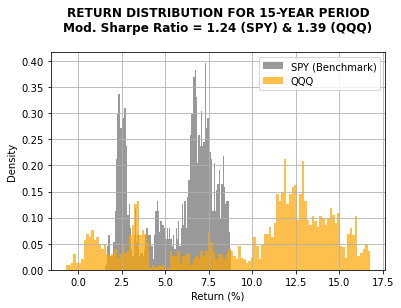

In [12]:
colors = ['darkblue','blue','lightblue','lightgreen','darkgreen','purple','orange','red']

for i in range(1,len(periods)+1,1):
    ax = df1.iloc[:,i].hist(bins=100,density=True,alpha=0.4,color='black')
    plt.xlabel('Return (%)')
    plt.ylabel('Density')
    df2.iloc[:,i].hist(bins=120,density=True,alpha=0.7,ax=ax,color=colors[i-1])
    plt.title('RETURN DISTRIBUTION FOR '+ str(periods[i-1]) + '-YEAR PERIOD\n'+
              'Mod. Sharpe Ratio = '+str(msr_1[i])+' ('+thicker_1+') & '+
              str(msr_2[i])+' ('+thicker_2+')'+'\n'
              ,fontweight='bold')
    plt.legend([thicker_1+' (Benchmark)',thicker_2])
    plt.show()

### 2.5. Return Distribution Comparison
In the graphs below the comparison returns for different time frames are reported.

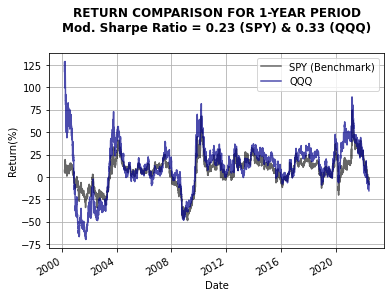

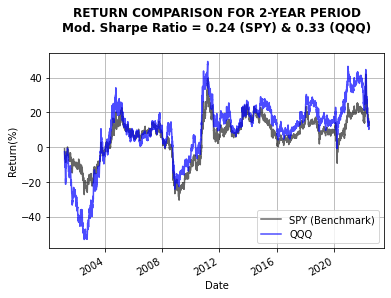

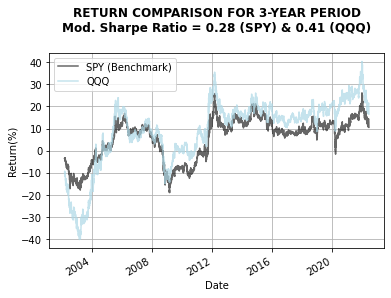

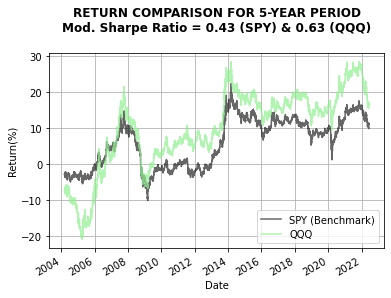

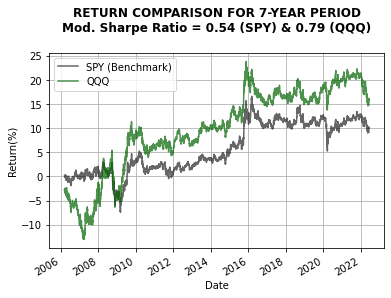

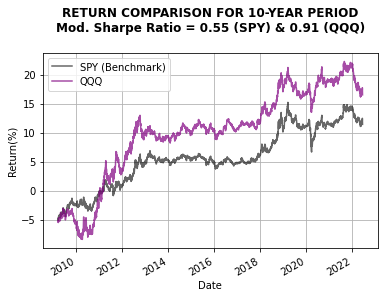

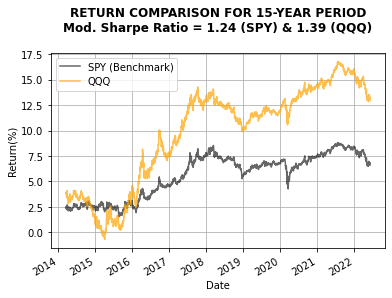

In [13]:
for i in range(1,len(periods)+1,1):
    df1.iloc[:,i].plot(color='black',alpha=0.6)
    df2.iloc[:,i].plot(color=colors[i-1],alpha=0.7)
    plt.ylabel('Return(%)')
    plt.title('RETURN COMPARISON FOR '+str(periods[i-1])+'-YEAR PERIOD\n'+
              'Mod. Sharpe Ratio = '+str(msr_1[i])+' ('+thicker_1+') & '+
              str(msr_2[i])+' ('+thicker_2+')'+'\n'
              ,fontweight='bold')
    plt.grid()
    plt.legend([thicker_1+' (Benchmark)',thicker_2])
    plt.show()

### 2.6. Return Correlation
Correlation between two equities returns are evaluated for different time frames. In particular, after a regression analysis is performed for each time interval set, _R square_ is calculated and reported in the graph. Another parameter called _Beta*_ is also reported. This parameter is not exactly  the same _Beta_ employed in finance, so the needs to use the "*" to avoid any confusion.

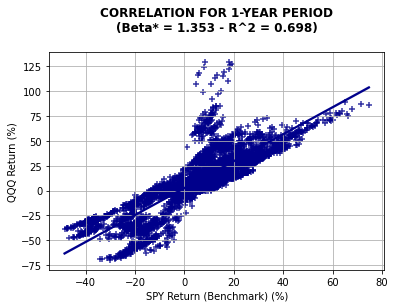

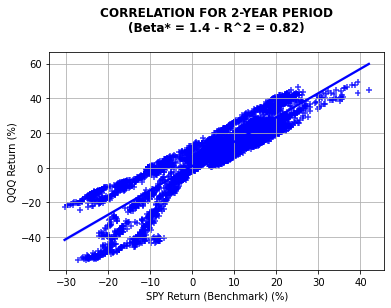

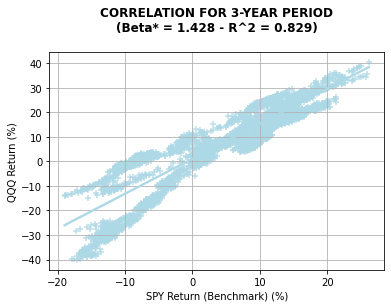

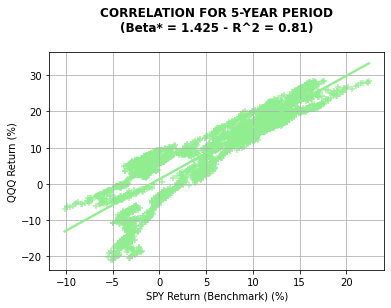

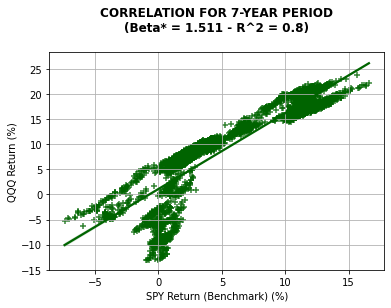

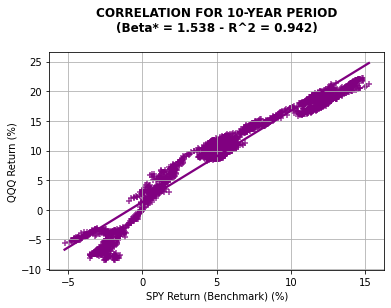

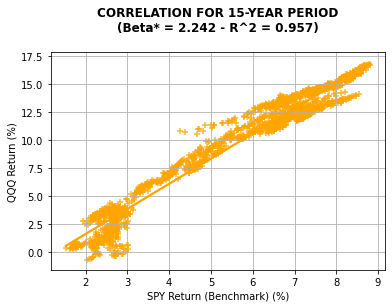

In [14]:
for i in range(1,len(periods)+1,1):
    if len(df1.iloc[:,i].dropna()) == 0: # This check is to skip the process when there are no returns
        pass
    else:
        # This section is to perform linear regression to evaluate the correlation between the two equities
        x = df1.iloc[:,i].dropna().values.reshape(-1, 1) 
        y = df2.iloc[:,i].dropna().values.reshape(-1, 1) 
        reg = LinearRegression()
        reg.fit(x,y)
        R_sq = reg.score(x,y)
        beta_ = reg.coef_[0][0] # Beta*

        # This section is to show the results for different timeframe
        sns.regplot(x=df1.iloc[:,i].dropna(),y=df2.iloc[:,i].dropna(),color=colors[i-1],marker='+')
        plt.title('CORRELATION FOR '+str(periods[i-1])+'-YEAR PERIOD\n(Beta* = '+str(round(beta_,3))+
                  ' - R^2 = '+str(round(R_sq,3))+')\n',fontweight='bold')
        plt.grid()
        plt.xlabel(thicker_1+' Return (Benchmark) (%)')
        plt.ylabel(thicker_2+' Return (%)')
        plt.show()

## 3. Excessive Return
In this section the excessive return calculated as difference between the return of the equity minus the return of the benchmark. This parameter is useful to evaluate if and by how much a specific equity "beats" the benchmark.

In [15]:
delta = df2 - df1 # Eccessive return of Equity #2 respect to Equity #1 (benchmark)
delta.drop(axis=1,columns=['Close'],inplace=True) # Remove the price column which is not used

# Positive and negative excessive return cases are cosniderede
pos = delta[delta>=0].describe() # Info for positive excessive return only
neg = delta[delta<0].describe() # Info for negative excessive return only

pos_cases = round(pos.loc['count'] / (pos.loc['count'] + neg.loc['count']) *100,1) # It counts the no. of cases with positive return
neg_cases = round(100 - pos_cases,1) # It counts the no. of cases with negative return

round(delta.describe(),2)

,Ann. Return for 1-y period,Ann. Return for 2-y period,Ann. Return for 3-y period,Ann. Return for 5-y period,Ann. Return for 7-y period,Ann. Return for 10-y period,Ann. Return for 15-y period
count,5602.00,5350.00,5098.00,4594.00,4090.00,3334.00,2074.00
mean,4.96,3.40,3.48,3.88,4.06,4.38,4.13
std,15.99,9.39,7.41,5.55,4.69,3.22,2.82
min,-49.28,-34.45,-24.26,-17.19,-12.98,-6.58,-3.10
25%,-1.58,0.55,1.93,3.43,4.40,3.93,2.28
50%,5.58,5.23,5.27,5.30,5.26,5.50,5.06
75%,10.49,8.44,7.80,7.07,6.40,6.42,6.48
max,120.40,21.36,15.26,12.10,10.38,8.46,8.00


In [16]:
round(pos,2) # Info for the positive excessive return

,Ann. Return for 1-y period,Ann. Return for 2-y period,Ann. Return for 3-y period,Ann. Return for 5-y period,Ann. Return for 7-y period,Ann. Return for 10-y period,Ann. Return for 15-y period
count,3965.00,4167.00,4094.00,3828.00,3470.00,2853.00,1819.00
mean,11.52,7.11,6.47,6.01,5.83,5.55,4.89
std,12.55,4.56,3.21,2.36,1.76,1.44,2.06
min,0.01,0.00,0.00,0.00,0.00,0.01,0.00
25%,4.87,3.78,3.98,4.55,4.84,4.75,3.86
50%,8.54,6.78,6.34,5.71,5.63,5.66,5.21
75%,12.59,9.15,8.49,7.55,6.64,6.56,6.72
max,120.40,21.36,15.26,12.10,10.38,8.46,8.00


In [17]:
round(neg,2) # Info for the negative excessive return

,Ann. Return for 1-y period,Ann. Return for 2-y period,Ann. Return for 3-y period,Ann. Return for 5-y period,Ann. Return for 7-y period,Ann. Return for 10-y period,Ann. Return for 15-y period
count,1637.00,1183.00,1004.00,766.00,620.00,481.00,255.00
mean,-10.92,-9.68,-8.71,-6.77,-5.83,-2.57,-1.32
std,11.72,10.28,7.17,4.55,3.47,1.76,0.70
min,-49.28,-34.45,-24.26,-17.19,-12.98,-6.58,-3.10
25%,-15.14,-18.02,-15.55,-11.23,-9.02,-4.01,-1.61
50%,-5.94,-4.23,-6.19,-5.89,-5.79,-2.56,-1.27
75%,-2.90,-1.62,-2.18,-2.99,-3.28,-0.74,-0.89
max,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01


### 3.1. Excessive Return Distribution
When the returns for the two equities are compared, the excessive can be calculated as specified in the previous section. The distribution of the excessive return for different time frames is shown in the graphs below. _Positive_ indicates the number of times, in percentage, when the excessive return is positive. Similar meaning is valid for _Negative_.


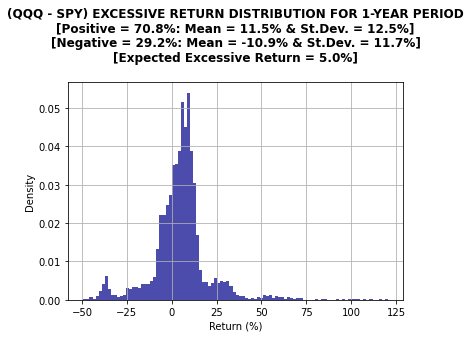

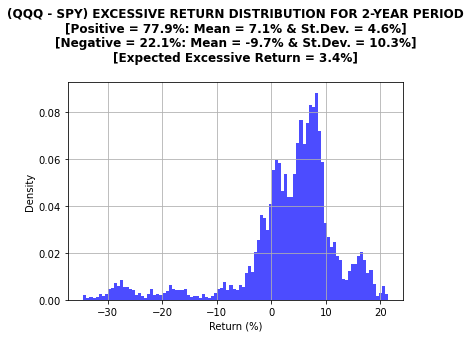

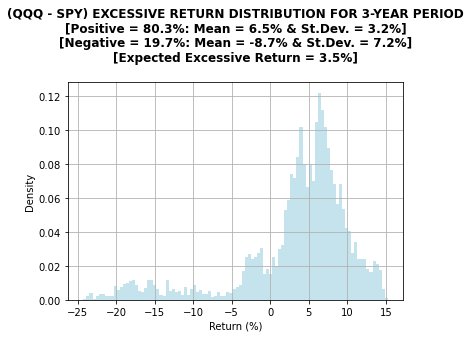

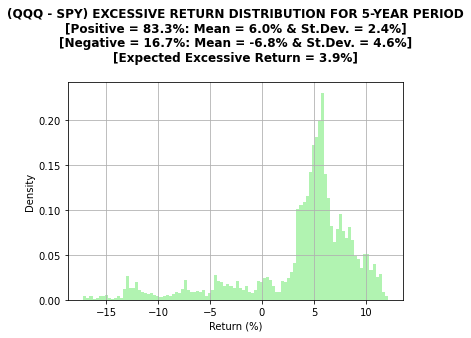

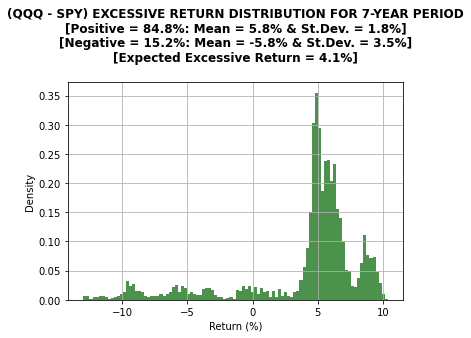

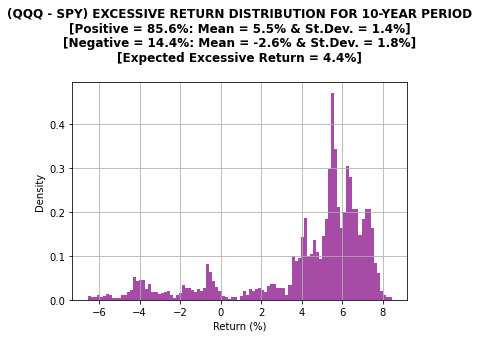

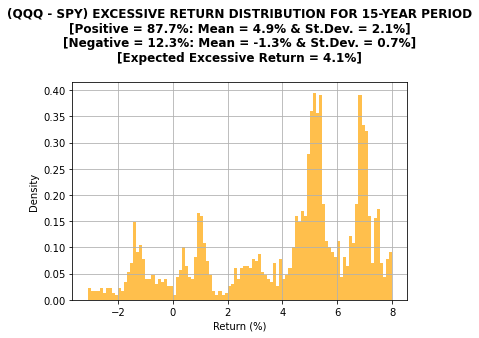

In [18]:
for i in range(0,len(periods),1):
    if len(delta.iloc[:,i].dropna()) == 0: # This check is to skip the process when there are no returns
        pass
    else:
        
        delta.iloc[:,i].hist(bins=100,density=True,color=colors[i],alpha=0.7)
        plt.title('('+thicker_2+' - '+thicker_1+') EXCESSIVE RETURN DISTRIBUTION FOR '+str(periods[i])+'-YEAR PERIOD\n'+
                  '[Positive = '+str(pos_cases[i])+'%: Mean = '+str(round(pos.loc['mean'][i],1))+
                  '% & St.Dev. = '+str(round(pos.loc['std'][i],1))+'%]'+
                  '\n[Negative = '+str(neg_cases[i])+'%: Mean = '+str(round(neg.loc['mean'][i],1))+
                  '% & St.Dev. = '+str(round(neg.loc['std'][i],1))+'%]'+
                  '\n[Expected Excessive Return = '+
                  str(round(pos.loc['mean'][i]*pos_cases[i]/100 + neg.loc['mean'][i]*neg_cases[i]/100,1))+'%]\n'
                  ,fontweight='bold')
        plt.xlabel('Return (%)')
        plt.ylabel('Density')
        plt.show()

### 3.2. Excessive Return
In the graphs below the time series for the returns calculated for different time frames are shown. When a time frame is selected, the time series gives an overview of the periods when an equity outperform or underperform the benchmark, giving a useful indication about the investment. 

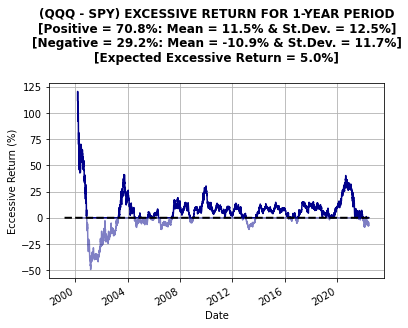

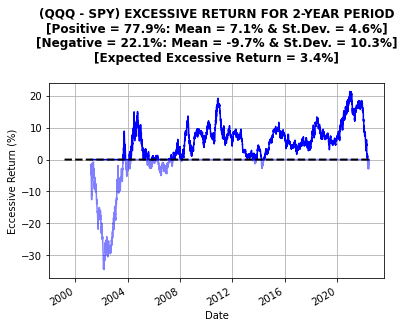

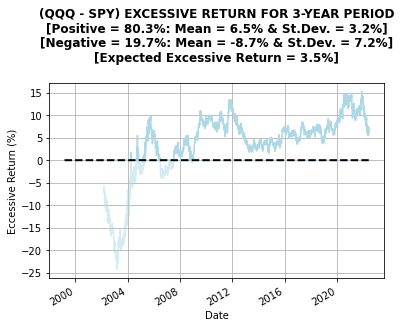

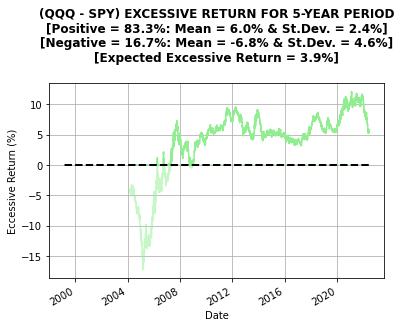

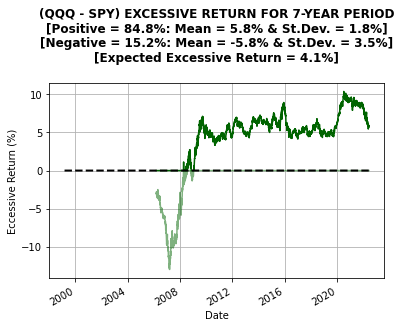

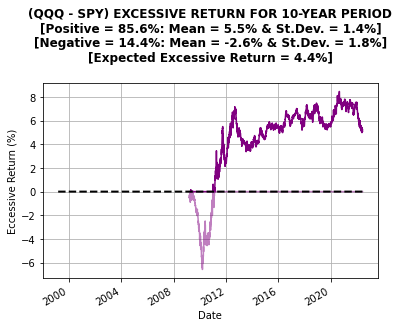

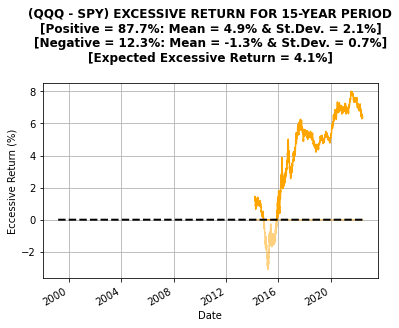

In [19]:
for i in range(0,len(colors)-1,1):
    if len(delta.iloc[:,i].dropna()) == 0: # This check is to skip the process when there are no returns
        pass
    else:
        A = pd.DataFrame(data=None,index=delta.index,columns=['Pos','Neg'])
        A['Pos'][delta.iloc[:,i]>=0] = delta.iloc[:,i][delta.iloc[:,i]>=0]
        A['Pos'][delta.iloc[:,i]<0] = 0
        A['Neg'][delta.iloc[:,i]<0] = delta.iloc[:,i][delta.iloc[:,i]<0]
        A['Neg'][delta.iloc[:,i]>=0] = 0
        A['Zeros'] = 0
        A.Pos.plot(color=colors[i],alpha=1)
        A.Neg.plot(color=colors[i],alpha=0.5)
        A['Zeros'].plot(c='Black',linewidth=2,linestyle='--')
        plt.grid()
        plt.ylabel('Eccessive Return (%)')
        plt.title('('+thicker_2+' - '+thicker_1+') EXCESSIVE RETURN FOR '+str(periods[i])+'-YEAR PERIOD\n'+
                  '[Positive = '+str(pos_cases[i])+'%: Mean = '+str(round(pos.loc['mean'][i],1))+
                  '% & St.Dev. = '+str(round(pos.loc['std'][i],1))+'%]'+
                  '\n[Negative = '+str(neg_cases[i])+'%: Mean = '+str(round(neg.loc['mean'][i],1))+
                  '% & St.Dev. = '+str(round(neg.loc['std'][i],1))+'%]'+
                  '\n[Expected Excessive Return = '+
                  str(round(pos.loc['mean'][i]*pos_cases[i]/100 + neg.loc['mean'][i]*neg_cases[i]/100,1))+'%]\n'
                  ,fontweight='bold')
        plt.show()

## 4.0 Conclusions
- The main intent of this analysis is to provide insight on what investment might be better when two ETFs, equities, bonds, etc. are compared against each other. Using historical data from Yahoo! Finance, a comparison between annualized returns is performed for different time frames (in years) in order to to cover multiple investment horizons.

- A parameter called ___Modified Sharpe Ratio___ was introduced to compare different returns, but also to take into account the _Risk Free Rate_ in the estimations. This parameter differs from the classic _Sharp Ratio_ mainly due to the info used to calculate it as clarified in the sections above.


- Graphs for __Return Distribution___ and ___Return Distribution Comparison___ were provided to present the result in a more clear and understandable way. At glance, these graphs allow to visually compare the two type of equities considered in termos of retunr and their related distribution. In each graph, main statistical information (main, standard deviation) is also provided for reference. For a better understanding of the relative behavior of the equities, ___Return Correlations___ were plotted with this aim.


- Using one of the equity as benchmark, ___Excessive Return___ is calculated for each selected investment time frame, providing visual representation of the ___Excessive Return Distribution___, in addition to the numerical values coming from the analysis.